In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import os
import numpy as np

In [2]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()

    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]

        # the the number of components is 3 or 4 consider it an RGB image
        if c not in (3, 4):
            nda = nda[nda.shape[0] // 2, :, :]

    elif nda.ndim == 4:
        c = nda.shape[-1]

        if c not in (3, 4):
            raise RuntimeError("Unable to show 3D-vector Image")

        # take a z-slice
        nda = nda[nda.shape[0] // 2, :, :, :]

    xsize = nda.shape[1]
    ysize = nda.shape[0]

    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * xsize / dpi, (1 + margin) * ysize / dpi

    plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
    ax = plt.gca()

    extent = (0, xsize * spacing[0], ysize * spacing[1], 0)

    t = ax.imshow(nda, extent=extent, interpolation=None)

    if nda.ndim == 2:
        t.set_cmap("gray")

    if(title):
        plt.title(title, fontdict = {'fontsize' : 200})

    plt.show()

In [3]:
def get_center(img):
    width, height, depth = img.GetSize()

    return img.TransformIndexToPhysicalPoint((int(np.ceil(width/2)),
                                          int(np.ceil(height/2)),
                                          int(np.ceil(depth/2))))

In [4]:
def resample(image, transform):
    reference_image = image
    interpolator = sitk.sitkLinear
    default_value = 0.0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

In [5]:
# Function for grabbing the max dimensions from a set of images 
def get_max_dimensions(files):
    file_dimensions = []
    max1 = 0; max2 = 0;
    for file in files:
        # read file 
        itkimage = sitk.ReadImage(file)

        # get dimension
        dimension = itkimage.GetSize()
        file_dimensions.append(dimension)

        # get the maximum largest x and largest y dimensions of the imageset
        if dimension[0] > max1:
            max1 = dimension[0]
        if dimension[1] > max2:
            max2 = dimension[1]
            
    return max1, max2, file_dimensions

0gray.tif


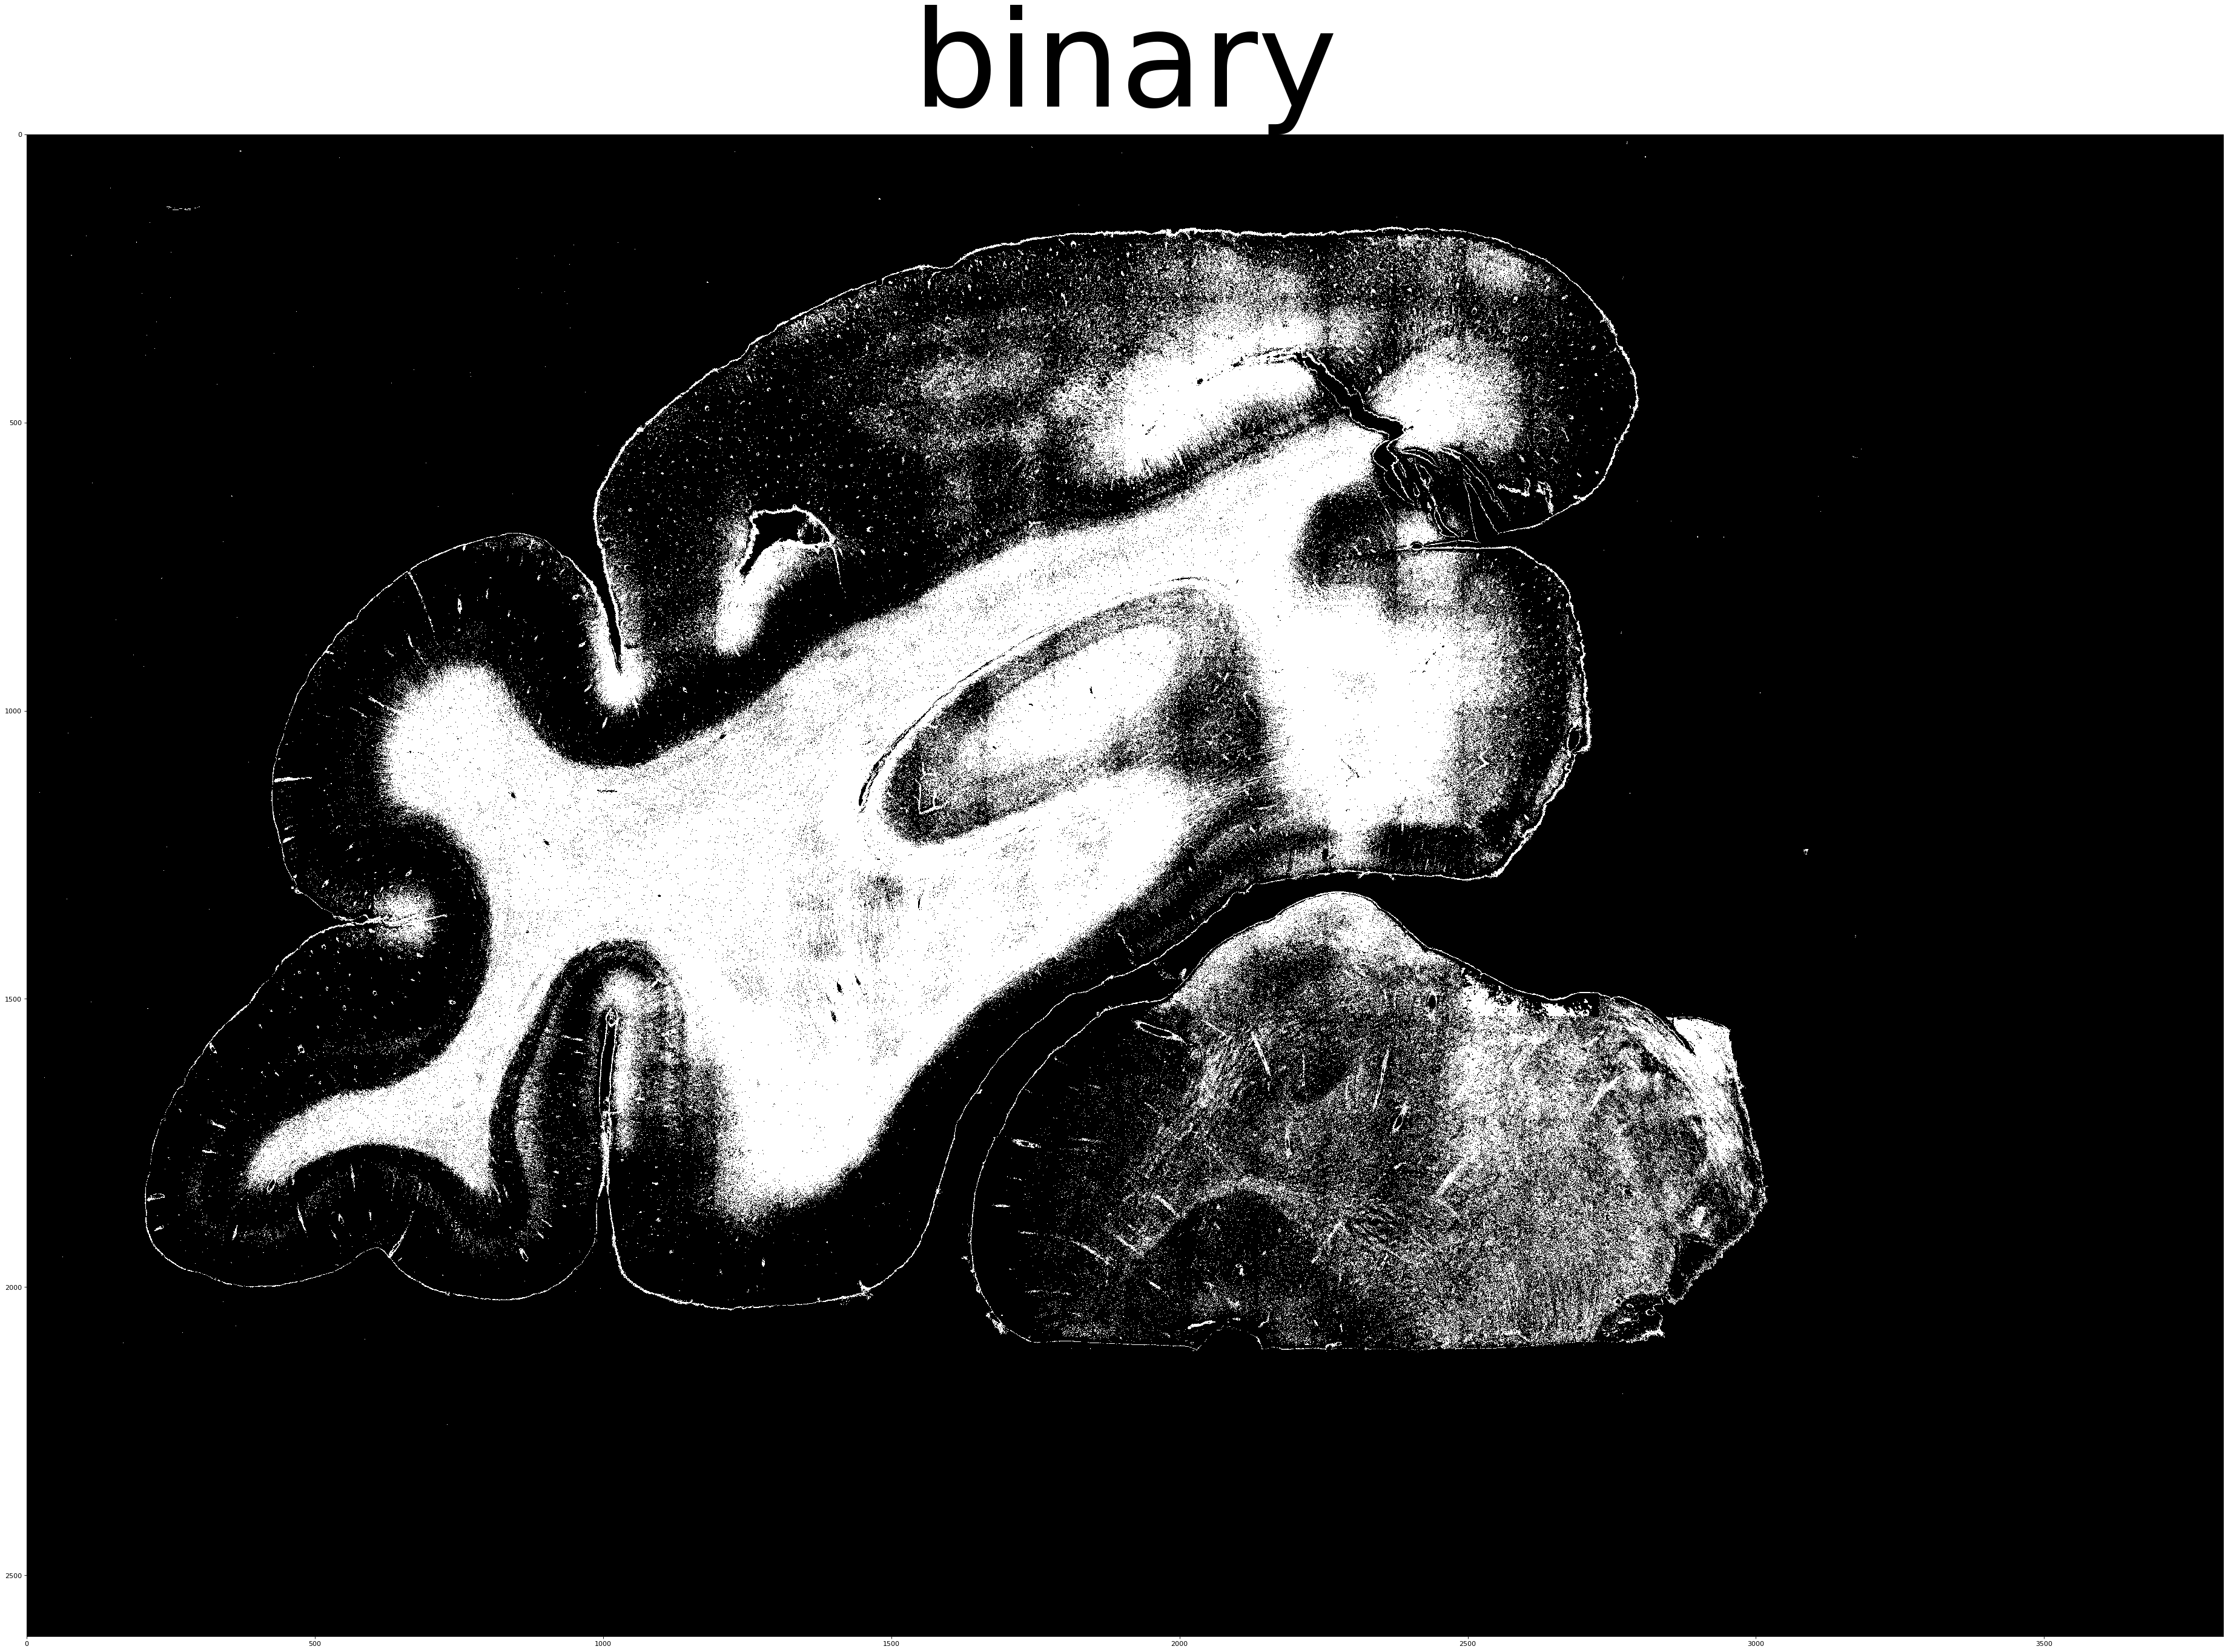

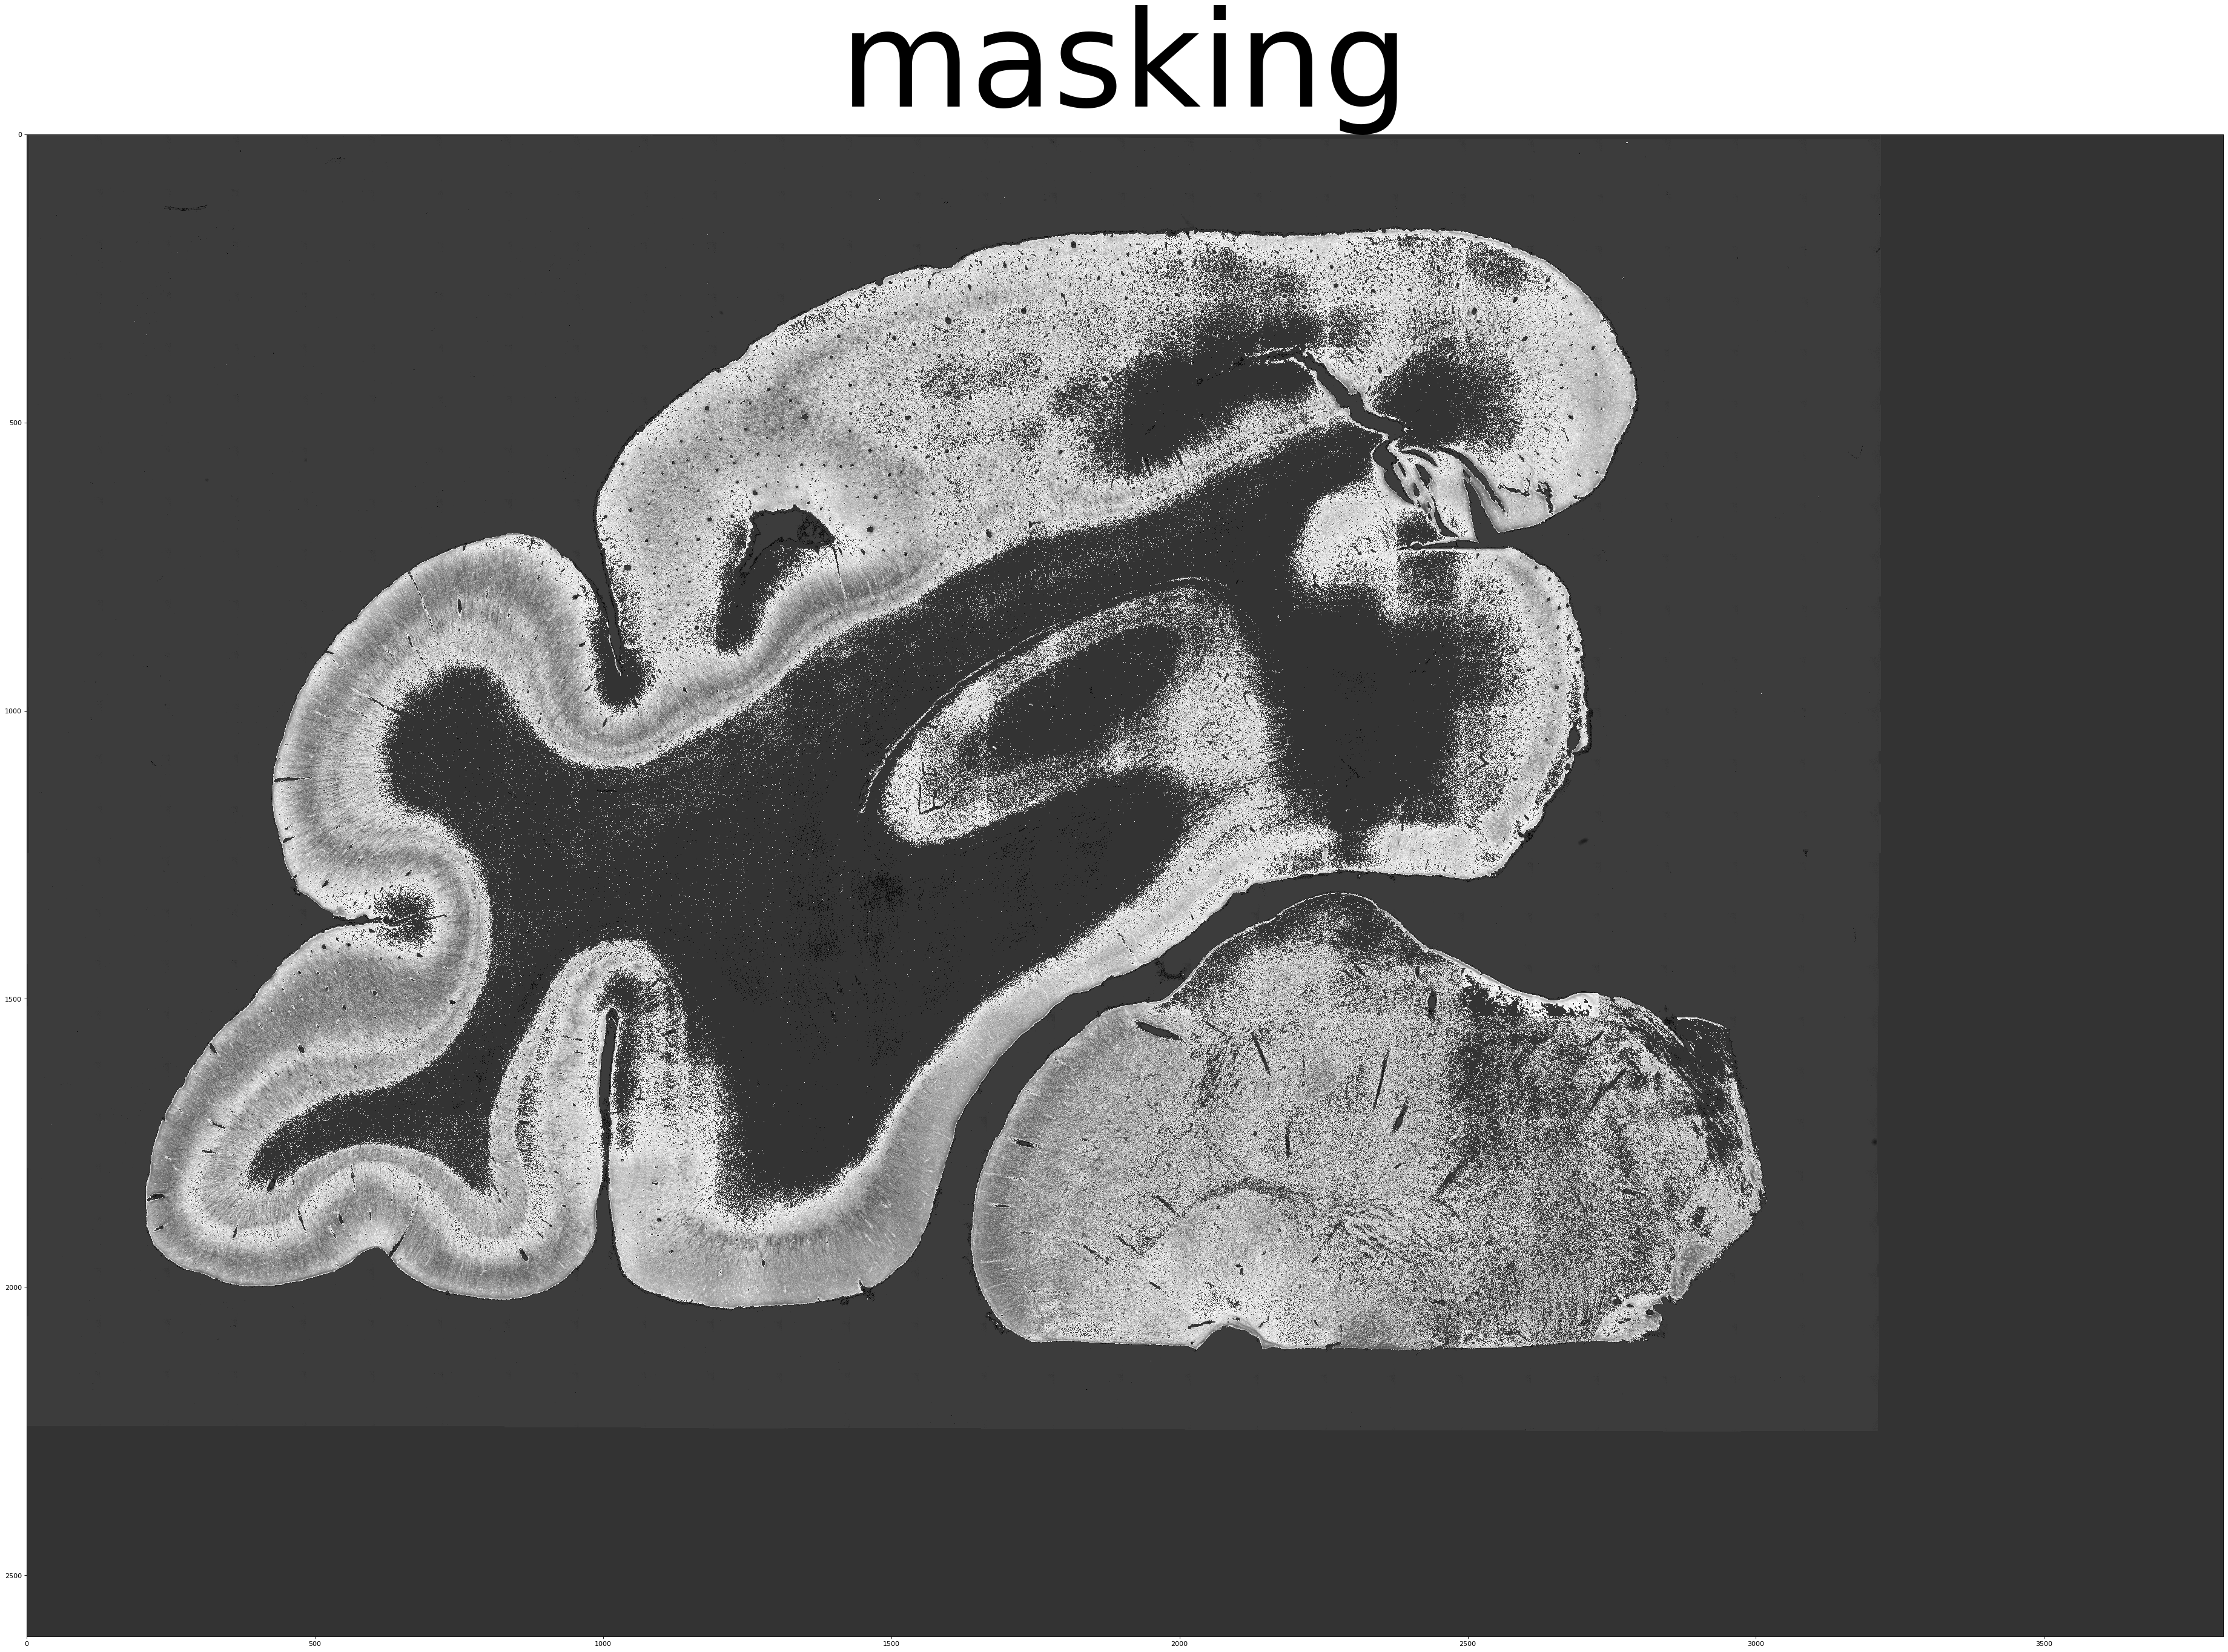

1gray.tif


In [10]:
# Change filepath to get to where files are saved
filepath = '/Users/jennytrieu/Desktop/Lab/HannoverResampledGray'
os.chdir(filepath)
files = os.listdir(filepath)

# thresh = [(16,255), (20,255), (18,228), (10,255),
#           (14,255), (14,247), (17,255), (9,254),
#           (12,238), (14,252), (10,247), (14,248),
#           (10,246), (12,255), (10,244), (12,255),
#           (14,243), (11,255), (15,255), (42,244),
#           (17,217), (16,250), (21,253), (18,220),
#           (23,212), (13,232), (13,213), (12,233),
#           (14,227), (13,216), (14,223), (8,229),
#           (14,232), (7,209), (22,255), (10,248)]

modified_images = []

for i, file in enumerate(files):
    filename = str(i) + 'gray.tif'
    img = sitk.ReadImage(filename)
    print(filename)
    
    if i == 1:
        break
    

    
    # Threshold image to remove background
    # replace BinaryThreshold with Otsu Threshold
    seg = sitk.OtsuThreshold(img)
#     OtsuThreshold (const Image &image, uint8_t insideValue=1u, uint8_t outsideValue=0u,
#     seg = sitk.BinaryThreshold(img,
#                                lowerThreshold=thresh[i][1], upperThreshold=thresh[i][0],
#                                insideValue=1, outsideValue=0)
    image_mask = sitk.Mask(img,seg,outsideValue = 0, maskingValue= 1)
    
    myshow(seg, "binary")
    myshow(image_mask, "masking")
    
    # Save image to modified images
    modified_images.append(image_mask)
    
    # Save image to modified images
    modified_images.append(image_mask)

filepath = '/Users/jennytrieu/Desktop/Lab'
os.chdir(filepath)
volume_images = sitk.JoinSeries(modified_images)
sitk.WriteImage(volume_images, 'Hannover_SMI_compiled.tif', True) 